In [1]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt

In [2]:
btc = pd.read_csv('BTC-USD.csv')
eth = pd.read_csv('ETH-USD.csv')
spy = pd.read_csv('SPY.csv')

In [3]:
spy['Date']

0       2019-04-15
1       2019-04-16
2       2019-04-17
3       2019-04-18
4       2019-04-22
           ...    
1253    2024-04-08
1254    2024-04-09
1255    2024-04-10
1256    2024-04-11
1257    2024-04-12
Name: Date, Length: 1258, dtype: object

## Data preprocessing

### Convert column name to perspective column name

In [4]:
btc.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [5]:
btc.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-04-13,5088.850098,5127.122070,5061.589355,5096.586426,5096.586426,10823289598
1,2019-04-14,5095.758789,5184.016113,5053.568359,5167.722168,5167.722168,10391952498
2,2019-04-15,5167.321777,5196.606934,5024.069336,5067.108398,5067.108398,12290155061
3,2019-04-16,5066.577637,5238.945313,5055.194824,5235.559570,5235.559570,11618660197
4,2019-04-17,5236.135254,5274.275391,5219.205566,5251.937988,5251.937988,12438480677


In [6]:
for i in btc.columns:
    if i != 'Date':
        btc['btc' +i] = btc[i]
        btc = btc.drop(i, axis = 1)

In [7]:
for i in eth.columns:
    if i != 'Date':
        eth['eth' +i] = eth[i]
        eth = eth.drop(i, axis = 1)

In [8]:
for i in spy.columns:
    if i != 'Date':
        spy['spy' +i] = spy[i]
        spy = spy.drop(i, axis = 1)

In [9]:
btc.head()

,Date,btcOpen,btcHigh,btcLow,btcClose,btcAdj Close,btcVolume
0,2019-04-13,5088.850098,5127.122070,5061.589355,5096.586426,5096.586426,10823289598
1,2019-04-14,5095.758789,5184.016113,5053.568359,5167.722168,5167.722168,10391952498
2,2019-04-15,5167.321777,5196.606934,5024.069336,5067.108398,5067.108398,12290155061
3,2019-04-16,5066.577637,5238.945313,5055.194824,5235.559570,5235.559570,11618660197
4,2019-04-17,5236.135254,5274.275391,5219.205566,5251.937988,5251.937988,12438480677


In [10]:
eth.columns

Index(['Date', 'ethOpen', 'ethHigh', 'ethLow', 'ethClose', 'ethAdj Close',
       'ethVolume'],
      dtype='object')

In [11]:
spy.columns

Index(['Date', 'spyOpen', 'spyHigh', 'spyLow', 'spyClose', 'spyAdj Close',
       'spyVolume'],
      dtype='object')

https://realpython.com/pandas-merge-join-and-concat/

In [12]:
df = pd.merge(btc, eth, on = ["Date"])

In [13]:
df.head()

,Date,btcOpen,btcHigh,btcLow,btcClose,btcAdj Close,btcVolume,ethOpen,ethHigh,ethLow,ethClose,ethAdj Close,ethVolume
0,2019-04-13,5088.850098,5127.122070,5061.589355,5096.586426,5096.586426,10823289598,164.622849,166.362427,163.011856,164.513351,164.513351,4959301561
1,2019-04-14,5095.758789,5184.016113,5053.568359,5167.722168,5167.722168,10391952498,164.476089,168.591034,162.781479,167.838516,167.838516,4846298303
2,2019-04-15,5167.321777,5196.606934,5024.069336,5067.108398,5067.108398,12290155061,167.897476,168.818451,159.555740,161.574173,161.574173,5672311824
3,2019-04-16,5066.577637,5238.945313,5055.194824,5235.559570,5235.559570,11618660197,161.526550,167.666321,160.888748,167.623444,167.623444,5180105341
4,2019-04-17,5236.135254,5274.275391,5219.205566,5251.937988,5251.937988,12438480677,167.553696,168.938583,165.501892,166.950760,166.950760,5596102715


In [14]:
df = pd.merge(df, spy, on = ['Date'])

In [15]:
df.head()

,Date,btcOpen,btcHigh,btcLow,btcClose,btcAdj Close,btcVolume,ethOpen,ethHigh,ethLow,ethClose,ethAdj Close,ethVolume,spyOpen,spyHigh,spyLow,spyClose,spyAdj Close,spyVolume
0,2019-04-15,5167.321777,5196.606934,5024.069336,5067.108398,5067.108398,12290155061,167.897476,168.818451,159.555740,161.574173,161.574173,5672311824,290.239990,290.350006,289.079987,289.970001,267.572266,49596700
1,2019-04-16,5066.577637,5238.945313,5055.194824,5235.559570,5235.559570,11618660197,161.526550,167.666321,160.888748,167.623444,167.623444,5180105341,290.950012,291.010010,289.500000,290.160004,267.747620,52153200
2,2019-04-17,5236.135254,5274.275391,5219.205566,5251.937988,5251.937988,12438480677,167.553696,168.938583,165.501892,166.950760,166.950760,5596102715,291.399994,291.429993,288.989990,289.450012,267.092377,58268300
3,2019-04-18,5251.480469,5319.986328,5250.506836,5298.385742,5298.385742,13256489918,166.913208,175.365326,166.672119,173.814026,173.814026,6971581464,290.100006,290.320007,288.660004,290.019989,267.618439,68708500
4,2019-04-22,5312.494629,5422.687500,5280.276855,5399.365234,5399.365234,14601631648,170.017487,173.069122,168.729553,171.874664,171.874664,6094878077,289.170013,290.440002,289.070007,290.269989,267.849091,40160100


In [16]:
btc.shape

(1828, 7)

In [17]:
spy.shape

(1258, 7)

In [18]:
df.shape

(1258, 19)

When merged, around 600 or 30% of data got lost

## Graph

In [19]:
df['DATE'] = pd.to_datetime(df['Date'])

<Axes: xlabel='DATE', ylabel='ethOpen'>

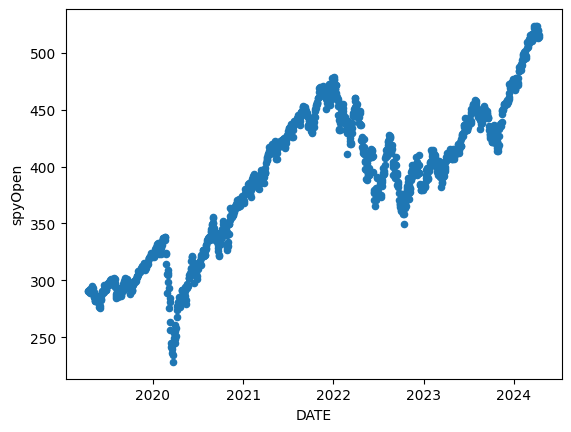

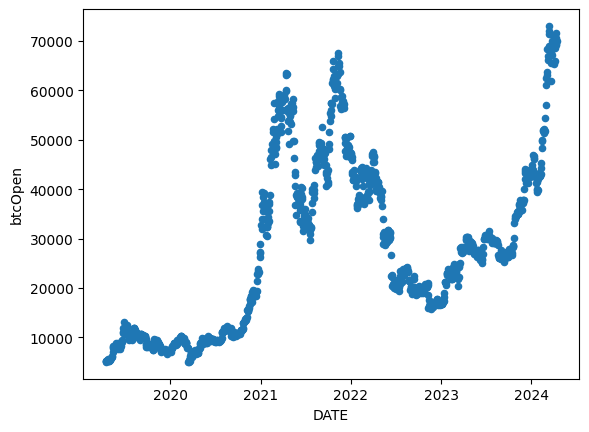

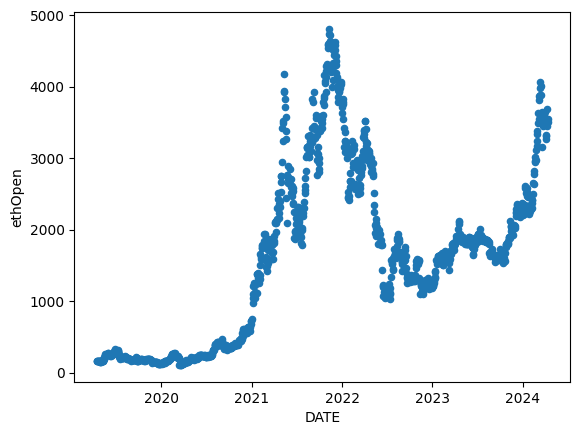

In [20]:
df.plot(x = 'DATE', y = 'spyOpen', kind = 'scatter')
df.plot(x = 'DATE', y = 'btcOpen', kind = 'scatter')
df.plot(x = 'DATE', y = 'ethOpen', kind = 'scatter')

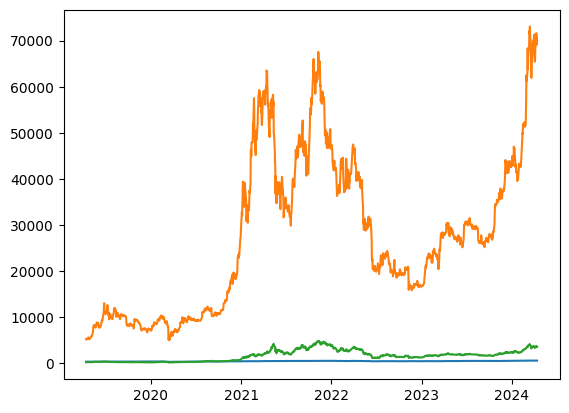

In [21]:
plt.plot(df['DATE'], df['spyOpen'], label = 'Spy Open')
plt.plot(df['DATE'], df['btcOpen'], label = 'Bitcoin Open')
plt.plot(df['DATE'], df['ethOpen'], label = 'Ethererum Open')
plt.show()

Emphasize the need to normalization data, otherwise we cannot compare them

# Normalize data

In [22]:
des = df.describe()

In [23]:
exception = ['Date', 'DATE']

In [24]:
for col in df.columns:
    if col not in exception:
        df[col] = (df[col] - des[col]['min']) / (des[col]['max'] - des[col]['min'])

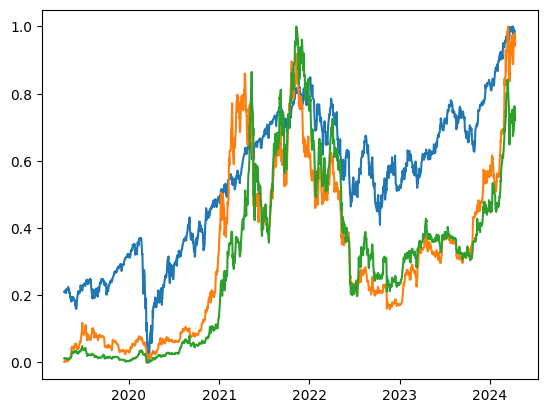

In [25]:
plt.plot(df['DATE'], df['spyOpen'], label = 'Spy Open')
plt.plot(df['DATE'], df['btcOpen'], label = 'Bitcoin Open')
plt.plot(df['DATE'], df['ethOpen'], label = 'Ethererum Open')
plt.show()